# BHG Assignment

In [1]:
### Importing modules

import pandas as pd  ## for data frame analysis
import numpy as np   ## for analysis

import matplotlib.pyplot as plt  ## for visulization
import seaborn as sns ## plotting

#import statsmodels.api as sm ## plotting

import scipy.stats as stats

import os  ##  for path and os

from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder  ## encoding of categorical variables
from sklearn.preprocessing import StandardScaler  ### to scale the variables between 0 and 1 for OLS regression

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import ElasticNet

# for feature engineering
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

import catboost as cb

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFECV

from importlib import reload
import utility_func 

from feature_engine.outliers import Winsorizer

reload(utility_func)

<module 'utility_func' from 'C:\\Piyush\\BHG\\Code\\utility_func.py'>

In [2]:
# Print current working directory
os.getcwd()

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
Bhg_df = pd.read_csv('..\data\\Bhg_data.csv')

### Reading the raw data and initial data check
1. Reading the raw file
2. Checking for data quality this includes size of the data (rows and colums), distribution of the data and % of null values

In [4]:
Bhg_df.head()

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
0,58.891377,5285.076955,8102.610429,-142802.4627,0.731818,61045.686450,183502.7911,2418498.392,27880.60083,360626.7592,4
1,57.641838,2094.137183,7432.119245,-147434.0657,2.527586,48485.220290,232809.7287,1779351.332,32153.75776,382670.3624,5
2,53.746536,5830.245294,6613.941822,-129496.5961,2.625691,36301.747910,214837.0432,2072100.771,30642.70182,370120.6062,2
3,36.168986,13039.246420,5270.829420,-439972.8126,0.844833,-5909.877785,173613.1204,1899841.158,41311.52728,329891.8986,4
4,32.669772,4611.755026,3456.822275,-138594.7123,4.058533,37602.705370,228498.4096,1925463.972,27522.27266,473752.7977,3


In [5]:
Bhg_df.shape

(10000, 11)

In [6]:
Bhg_df.describe()

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,12.190351,8445.963010,3450.252510,168505.815510,1.610510,73390.402240,85873.402570,1.150636e+06,22190.066240,153862.395490,3.032500
std,16.020137,3540.407793,2544.552718,154606.758685,0.799212,42488.751840,71600.020020,8.840513e+05,9835.270071,84665.459925,1.410901
min,-20.486397,-5583.153749,-6338.250221,-439972.812600,-1.328607,-77050.448580,-162312.422300,-2.692945e+06,-12674.425590,-135125.465700,1.000000
25%,0.342919,6012.666381,1689.792306,64840.482335,1.070263,44707.280773,37958.405845,5.353268e+05,15593.819880,96818.711418,2.000000
50%,10.881019,8463.373285,3430.595021,167029.781400,1.598712,73543.761555,86582.980525,1.149984e+06,22091.102400,154089.232450,3.000000
75%,23.047831,10864.843605,5165.408836,272343.174250,2.146489,102189.829900,133951.621325,1.742196e+06,28924.445840,211875.685575,4.000000
max,94.749833,23299.976630,12288.699000,857156.728100,4.639956,242913.447400,357758.526300,4.315470e+06,58807.189120,473752.797700,5.000000


In [7]:
##  Checking null values in each column

Bhg_df.isnull().sum()

y         0
var_1     0
var_2     0
var_3     0
var_4     0
var_5     0
var_6     0
var_7     0
var_8     0
var_9     0
var_10    0
dtype: int64

In [8]:
## Checking the datatype for each variable

Bhg_df.dtypes

y         float64
var_1     float64
var_2     float64
var_3     float64
var_4     float64
var_5     float64
var_6     float64
var_7     float64
var_8     float64
var_9     float64
var_10      int64
dtype: object

In [9]:
### Variabl 10 is integer and looks like only has few unique values
### Let's check the frequenct count for each of the category

Bhg_df['var_10'].value_counts(dropna=False)/Bhg_df.shape[0]

4    0.2086
5    0.2033
3    0.1989
2    0.1957
1    0.1935
Name: var_10, dtype: float64

In [10]:
## compare the distribution of y for each of the category in var_10

Bhg_df.groupby(['var_10']).agg(
                                  mean_y = ('y','mean')
                                ,median_y = ('y','median')
                                ,std_y = ('y','std')
                            ).reset_index()

,var_10,mean_y,median_y,std_y
0,1,11.678159,10.063880,15.387418
1,2,15.257419,13.360678,16.023784
2,3,14.070371,13.292184,15.551276
3,4,7.561725,5.780374,15.634229
4,5,12.635403,11.174004,16.370913


### Summmary of intial data analysis

1. Target variable Y is a continuous variables which varies from -20 to 94 with standard deviation of 16
2. In total there are 10 independent variables among them 9 are continous and 1 is discrete variables
3. var_10 which is a discrete variable has 5 unique values. This looks like a categorical variable which has been coded
as number

### Plotting the distribution of each variable

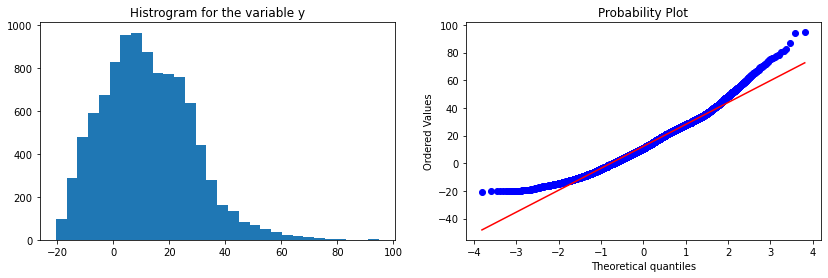

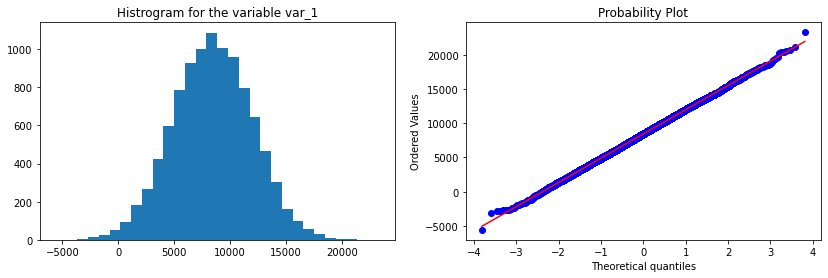

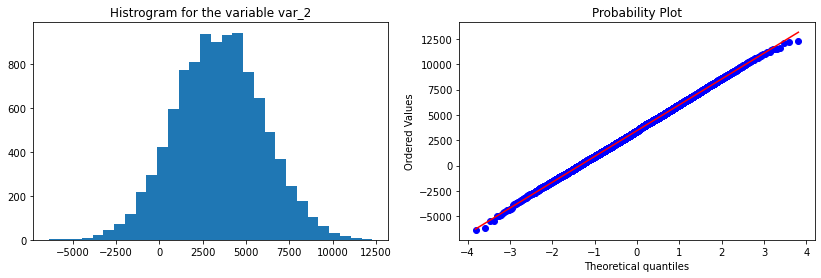

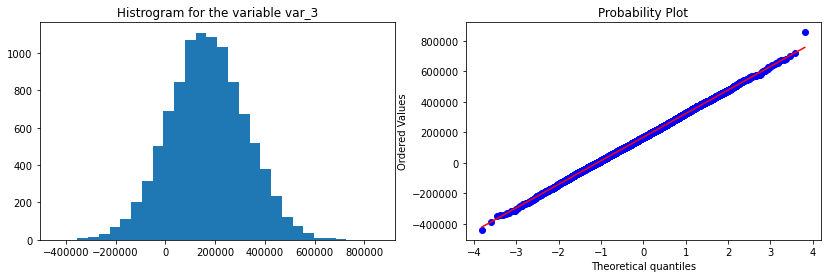

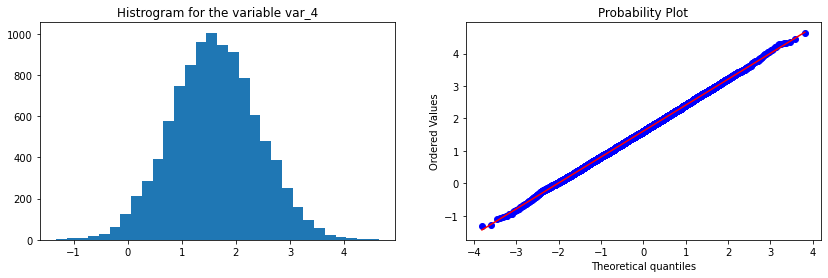

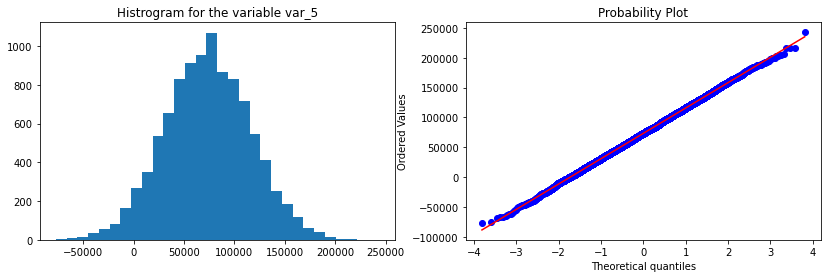

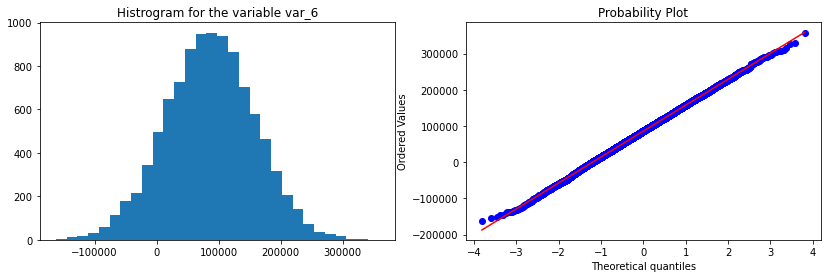

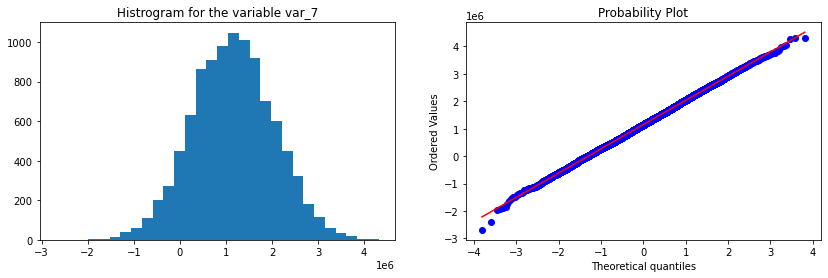

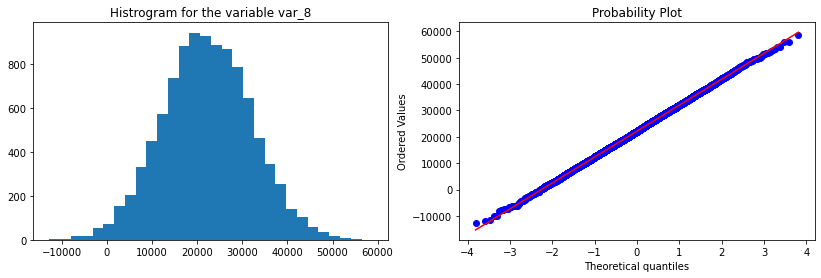

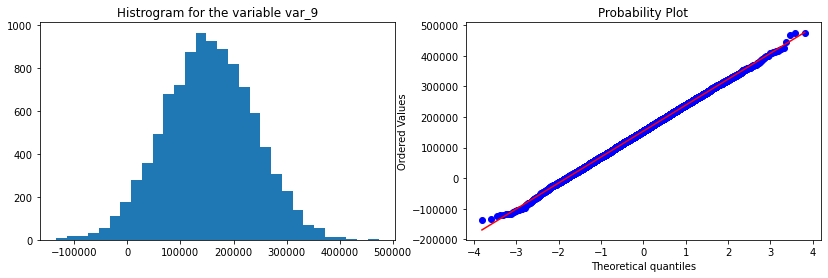

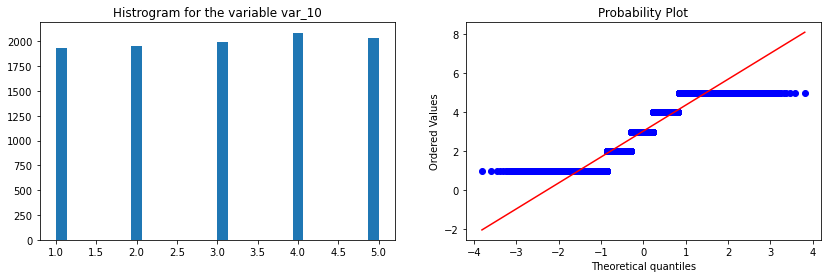

In [11]:
### Plot the histrogram and qq plot of the variables in df
        
utility_func.diagnostic_plots(Bhg_df,figsize=[14,4])

###  Conclusions 
1. We can see that other than variable y and frequency variable (var_10) all other variables are almost normally distributed
2. var_10 is cateogorial variable

### Examine the relationship of independent variables with target
1. For numerical variables we will plot the scater plot
2. For categorial variable(var_10) we will plot the box plot to see the target distribution in each category

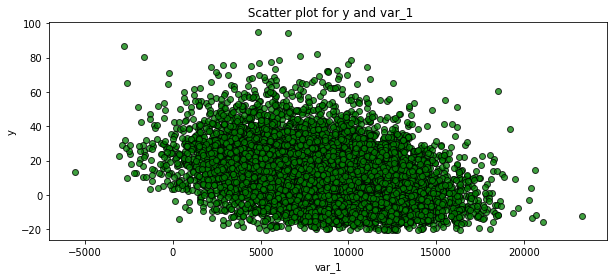

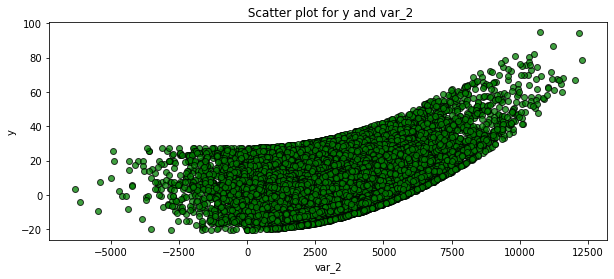

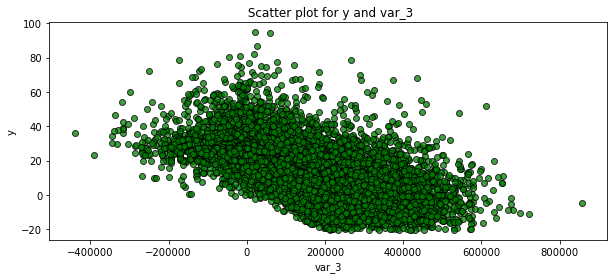

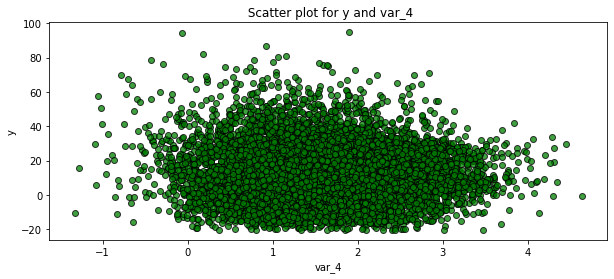

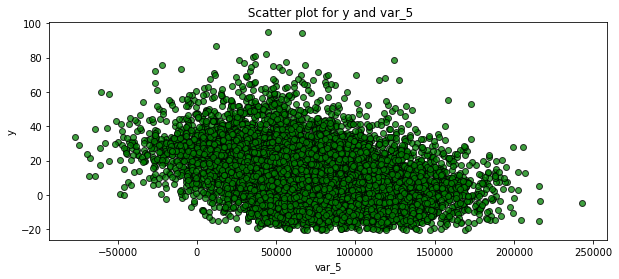

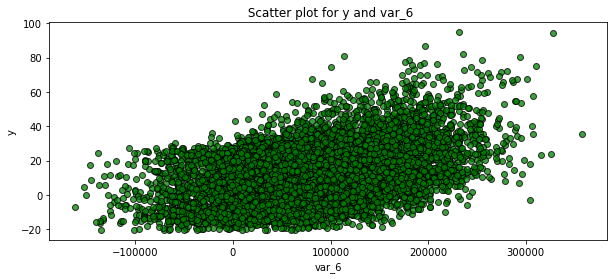

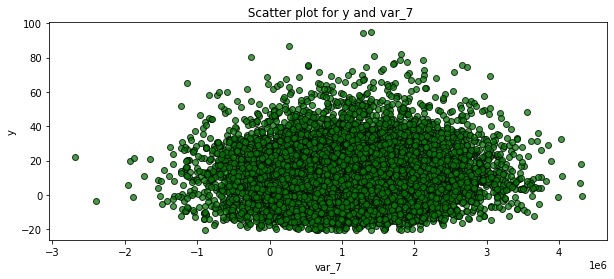

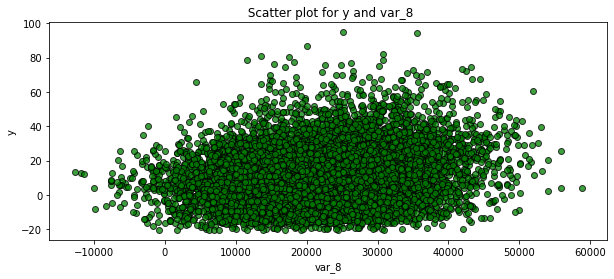

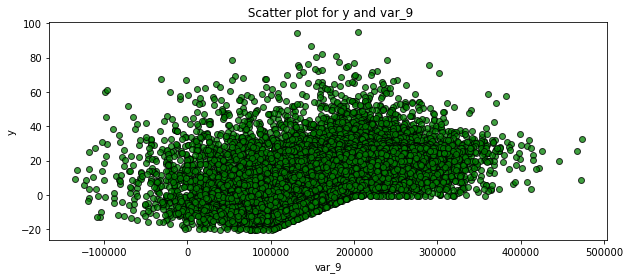

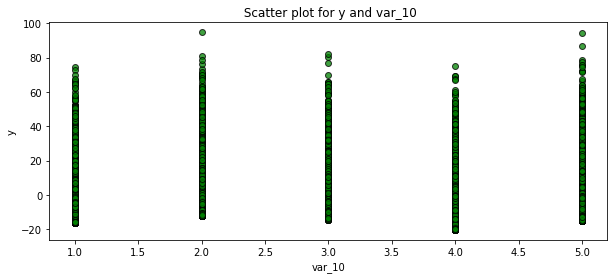

In [12]:
utility_func.scatter_plot(Bhg_df,'y',figsize=(10,4))

### Conclusions from Scatter plot

1 For var_2 the square of the variable has more linear trend then the actual variable it self
2. The scatter plot between y and var_2 looks like the graph of X**2. This means X**2 and Y should have linear trend
3. Let's verify the trend between var_2**2 and y

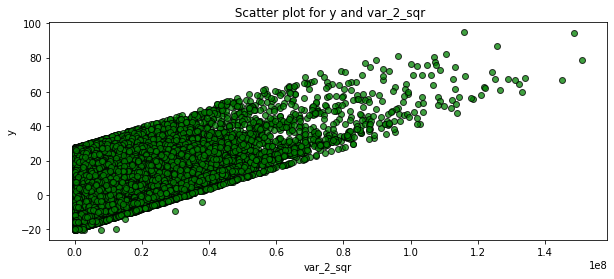

In [13]:
### Trend between var_2**2 and y is pretty much normal. So for linear model let's add var_2 in the data set

Bhg_df['var_2_sqr'] = Bhg_df['var_2']**2


utility_func.scatter_plot(Bhg_df[['var_2_sqr','y']],'y',figsize=(10,4))

### Corelation analysis of the numerical variables

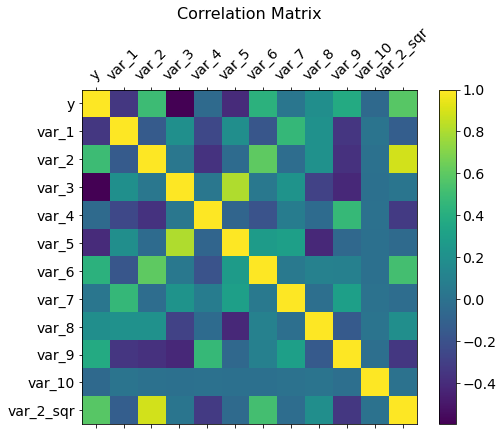

In [14]:
corr_df = utility_func.correlation(Bhg_df,figsize=(8,6))

In [15]:
corr_df

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_2_sqr
y,1.000000,-0.336184,0.497815,-0.596058,-0.045849,-0.401891,0.429807,0.029095,0.194788,0.379986,-0.052502,0.583841
var_1,-0.336184,1.000000,-0.135317,0.196789,-0.251892,0.191826,-0.169298,0.469718,0.212547,-0.342938,0.016748,-0.120922
var_2,0.497815,-0.135317,1.000000,0.033808,-0.359648,-0.035389,0.602046,-0.026948,0.208451,-0.370873,0.001143,0.890143
var_3,-0.596058,0.196789,0.033808,1.000000,0.036211,0.808120,0.040761,0.225848,-0.283731,-0.409241,-0.005825,0.024499
var_4,-0.045849,-0.251892,-0.359648,0.036211,1.000000,-0.075834,-0.188209,0.075821,-0.039344,0.474635,-0.003559,-0.326090
var_5,-0.401891,0.191826,-0.035389,0.808120,-0.075834,1.000000,0.277714,0.303735,-0.413344,-0.054084,-0.009498,-0.043653
var_6,0.429807,-0.169298,0.602046,0.040761,-0.188209,0.277714,1.000000,0.046405,0.103821,0.097726,-0.009607,0.524203
var_7,0.029095,0.469718,-0.026948,0.225848,0.075821,0.303735,0.046405,1.000000,-0.011027,0.305034,0.006891,-0.026781
var_8,0.194788,0.212547,0.208451,-0.283731,-0.039344,-0.413344,0.103821,-0.011027,1.000000,-0.146210,0.015578,0.190180
var_9,0.379986,-0.342938,-0.370873,-0.409241,0.474635,-0.054084,0.097726,0.305034,-0.146210,1.000000,-0.011332,-0.337852


### Summary of Correlation Analysis

1. The correlation between var_3 and var_5 var_2 and var_6 is seems to be high (.8,.6 respectively) 

### Modeling Approach

For model building we need to decide the meric and the data sets both for model builing and model perofrmance avaluation

#### Metric Determiniation

For continuous target variables we can use root mean square error (RMSE) or absolute error (ABSE) . The RMSE penalise higher error more.

The final selection of the metric is done based the bsuiness case. Since we don't have the business problem here so we will
use the RMSE for this model building exercise.

1. First we will split the data in train and test. The train data will be used to build the model and the test data 
set to measure the performance

2. Since there are no rare segements and the only categorical column also has almost equal distribution of the values
so random split is good enough and we don't need stratified split

#### Model building algorithm

1. We will start with regulariazed linear regression and build a base model

2. Since we also have a categorical variabl so we will also use the the CatBoost which usually have the best perofrmance
among all boosting elgorithm in case of categorical columns

3. AFter comparing the result of these two models we will start feature engineering

4. For Ordinary Ordinary Least Squares (OLS) linear regression model one of the assumption is predictor should be indepedent. 
But as we saw couple of variables have high corelation. So we have to consider VIF as one variables could be predicted by 
combination of multiple variables.

5. For Ensamble models likes Boosting (XGBoost, CatBoost, Light GBM) multi culinearty is not a problem but the variable 
importance will get highly impacted. If the two variables are highly corelated then any of the variable can provide the split
since both of them will have simialar impure treee


#### Model Building Procedure

1. Splitting the data in train and test:
        1. Need to provide random_state for reproducibility
        2. Need to Shuffle
        3. Test size we will taken as 20%
        
    
2. For OLS, Encode the categorical/discrete variable. Initially we will use One hot encoding. Again for ensemble model 
its not necessary.

3. For OLS, We also have to scale the variable using standarizer or min max scaler. For Ensembles method we don't need it.
Also, for sclaing we will use only train data. Once we get theam mean and standard deviation for train data, we will scale
the test based on hese values. This is to avoid data leakage from train to test

In [16]:
##  Need to provide random_state for reproducibility
##  Need to Shuffle 
##  Test size we will take as 20%

Bhg_df['var_10'] = Bhg_df['var_10'].astype(str)

Bhg_train_df, Bhg_test_df = train_test_split(Bhg_df,test_size=0.2, random_state=42,shuffle=True)

In [17]:
Bhg_train_df.shape

(8000, 12)

In [18]:
Bhg_test_df.shape

(2000, 12)

In [19]:
Bhg_train_df.head()

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_2_sqr
9254,-7.421907,8355.151233,2871.445496,428646.41590,1.744506,107084.20740,12833.806030,1.340301e+06,22155.976290,73805.29156,2,8.245199e+06
1561,25.500000,8158.027319,-1454.530138,-89838.58512,2.421938,66739.18108,1145.451428,1.438032e+06,14285.305820,356105.28750,3,2.115658e+06
1670,27.776466,6371.030151,678.805691,-83696.47600,1.506342,18590.07320,49817.459190,8.563878e+05,18374.731310,271229.59980,2,4.607772e+05
6087,3.790586,9034.047125,2556.558300,243090.89530,0.980197,121042.76590,7654.954981,1.886371e+06,-9911.446565,171844.95700,3,6.535990e+06
6669,-0.450017,7104.138850,5774.440625,357983.98620,1.665088,95874.80843,128263.998300,8.685285e+05,32922.185550,91303.16116,4,3.334416e+07


##### Encoding of categorical variables

In [20]:
###  Scaling the variables between 0 and 1 using standarize scaler
###  Scaling is required to get the true variable importance and also for faster conversion rate

# standardisation: with the StandardScaler from sklearn
# Also the one hot encoded variable are already between 0 and 1 so we don't need to scale them

# Create an object using StandardScaler class

Bhg_train_df['var_10'] = Bhg_train_df['var_10'].astype(str)

Numeric_var = Bhg_df.select_dtypes(include=[np.number]).columns.tolist()
Numeric_var.remove('y')

print("numeric variable list is ",Numeric_var)

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(Bhg_train_df[Numeric_var])

# transform train and test sets


X_train_scaled = pd.DataFrame(scaler.transform(Bhg_train_df[Numeric_var]),columns = Numeric_var)  

### Scale the test test
X_test_scaled = pd.DataFrame(scaler.transform(Bhg_test_df[Numeric_var]),columns = Numeric_var)


#### Encoding of categorical variables
#### We will try multiple encoidng method and will try all of them one by one in modeling to see which one give better result


ohe_enc = fe_OneHotEncoder(
                            top_categories=None,
                            variables=['var_10'],  # we can select which variables to encode
                            drop_last=True
                            )  # to return k-1, false to return k

ohe_enc.fit(Bhg_train_df)


train_one_hot_encoder  = ohe_enc.transform(Bhg_train_df).reset_index()


###  The value we used to encode in train will be used to encode the test
###  This is to make sure there is no information leakage from train to test

test_one_hot_encoder = ohe_enc.transform(Bhg_test_df).reset_index()

scaled_train_df = pd.concat([X_train_scaled,
                                   train_one_hot_encoder[['var_10_2','var_10_3','var_10_4','var_10_5','y']]
                                  ],axis=1)

scaled_test_df = pd.concat([X_test_scaled,
                                   test_one_hot_encoder[['var_10_2','var_10_3','var_10_4','var_10_5','y']]
                                  ],axis=1)


### Mean Encoder using feature engine

mean_enc = ce.MeanEncoder( variables=['var_10'] )


# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

mean_enc.fit(Bhg_train_df, Bhg_train_df['y'])

# in the encoder dict we see the target mean assigned to each
# category for each of the selected variables

print(mean_enc.encoder_dict_)

train_mean_encoder = mean_enc.transform(Bhg_train_df).reset_index()
test_mean_encoder  = mean_enc.transform(Bhg_test_df).reset_index()

train_mean_encoder.rename(columns ={'var_10':'mean_encoded_var_10'},inplace=True)
test_mean_encoder.rename(columns ={'var_10':'mean_encoded_var_10'},inplace=True)

# let's explore the result

scaled_train_df = pd.concat([scaled_train_df,train_mean_encoder[['mean_encoded_var_10']] ],axis=1)
scaled_test_df = pd.concat([scaled_test_df,test_mean_encoder[['mean_encoded_var_10']] ],axis=1)


numeric variable list is  ['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_2_sqr']
{'var_10': {'1': 11.458930632262721, '2': 14.981152013709481, '3': 14.19588760727627, '4': 7.578519633638657, '5': 12.647127819162309}}


<ipython-input-20-10bfb6e6b1ef>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bhg_train_df['var_10'] = Bhg_train_df['var_10'].astype(str)


In [21]:
scaled_train_df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_2_sqr,var_10_2,var_10_3,var_10_4,var_10_5,y,mean_encoded_var_10
0,-0.027745,-0.216586,1.698360,0.166117,0.798585,-1.008107,0.213107,-0.003065,-0.943408,-0.501718,1,0,0,0,-7.421907,14.981152
1,-0.083316,-1.901396,-1.694682,1.010388,-0.163795,-1.170284,0.323879,-0.806059,2.376166,-0.806333,0,1,0,0,25.500000,14.195888
2,-0.587088,-1.070539,-1.654487,-0.130702,-1.312331,-0.494955,-0.335380,-0.388841,1.378111,-0.888574,1,0,0,0,27.776466,14.981152
3,0.163643,-0.339223,0.484058,-0.786427,1.131549,-1.079964,0.832044,-3.274699,0.209444,-0.586659,0,1,0,0,3.790586,14.195888
4,-0.380418,0.914025,1.235935,0.067139,0.531199,0.593500,-0.321619,1.095343,-0.737650,0.745605,0,0,1,0,-0.450017,7.578520


In [22]:
scaled_test_df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_2_sqr,var_10_2,var_10_3,var_10_4,var_10_5,y,mean_encoded_var_10
0,1.687827,-0.182414,-0.420550,-1.035229,0.160695,0.530776,0.219687,-0.135920,-0.618211,-0.476294,0,0,0,0,-1.439786,11.458931
1,0.421492,0.423734,-0.641090,-0.801321,-0.341473,-0.514802,-0.426410,0.280362,-0.680726,0.101843,1,0,0,0,12.637506,14.981152
2,-2.179259,1.092711,0.013799,-0.461441,-0.727292,-0.523127,0.093580,-1.357678,0.165579,1.019387,0,1,0,0,25.311755,14.195888
3,-0.415068,0.146640,0.340039,0.174086,0.228227,0.460035,0.300275,0.555986,0.056763,-0.192319,1,0,0,0,7.954776,14.981152
4,-0.835946,0.485490,0.318293,1.285878,-0.346750,0.369020,-0.508805,0.093931,-0.107262,0.174259,0,1,0,0,7.590831,14.195888


In [23]:
scaled_train_df['mean_encoded_var_10'].value_counts(dropna=False)

7.578520     1666
12.647128    1608
14.195888    1600
14.981152    1573
11.458931    1553
Name: mean_encoded_var_10, dtype: int64

In [24]:
scaled_test_df['mean_encoded_var_10'].value_counts(dropna=False)

12.647128    425
7.578520     420
14.195888    389
14.981152    384
11.458931    382
Name: mean_encoded_var_10, dtype: int64

##### Using VIF to remove multi culinearty

In [25]:
Numeric_var_vif = scaled_train_df.select_dtypes(include=[np.number]).columns.tolist()

In [26]:
Numeric_var_vif

['var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_2_sqr',
 'var_10_2',
 'var_10_3',
 'var_10_4',
 'var_10_5',
 'y',
 'mean_encoded_var_10']

In [27]:
### remove 'var_2_sqr' and target variable 'y'

Numeric_var_vif = list(set(Numeric_var_vif) - set(['var_2_sqr','y']))

In [28]:
var_list_after_vif ,vif_var_list = utility_func.vif(scaled_train_df,Numeric_var_vif,VIF_threshold=10)

current var is  var_3
var_3 is removed
max vif is  19.296729131162603


In [29]:
var_list_after_vif

['var_2',
 'var_7',
 'var_4',
 'var_10_5',
 'var_5',
 'mean_encoded_var_10',
 'var_10_2',
 'var_9',
 'var_6',
 'var_8',
 'var_10_3',
 'var_1',
 'var_10_4']

In [30]:
vif_var_list

['var_3']

In [31]:
scaled_train_df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_2_sqr,var_10_2,var_10_3,var_10_4,var_10_5,y,mean_encoded_var_10
0,-0.027745,-0.216586,1.698360,0.166117,0.798585,-1.008107,0.213107,-0.003065,-0.943408,-0.501718,1,0,0,0,-7.421907,14.981152
1,-0.083316,-1.901396,-1.694682,1.010388,-0.163795,-1.170284,0.323879,-0.806059,2.376166,-0.806333,0,1,0,0,25.500000,14.195888
2,-0.587088,-1.070539,-1.654487,-0.130702,-1.312331,-0.494955,-0.335380,-0.388841,1.378111,-0.888574,1,0,0,0,27.776466,14.981152
3,0.163643,-0.339223,0.484058,-0.786427,1.131549,-1.079964,0.832044,-3.274699,0.209444,-0.586659,0,1,0,0,3.790586,14.195888
4,-0.380418,0.914025,1.235935,0.067139,0.531199,0.593500,-0.321619,1.095343,-0.737650,0.745605,0,0,1,0,-0.450017,7.578520


In [32]:
features = var_list_after_vif

target = 'y'

#features.remove(target)

##### Elastic Net Model 1

In [33]:
# define model
model = ElasticNet(random_state=0)
# define model evaluation method
cv = 5
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
E_Net1 = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1,verbose=True)
# perform the search
E_Net1.fit(scaled_train_df[features], scaled_train_df['y'])
# summarize
print('neg_mean_squared_error: %.3f' % E_Net1.best_score_)
print('Config: %s' % E_Net1.best_params_)



Fitting 5 folds for each of 900 candidates, totalling 4500 fits
neg_mean_squared_error: -54.688
Config: {'alpha': 0.01, 'l1_ratio': 0.99}


test mse: 52.58190700619163
test rmse: 7.251338290701353
test r2: 0.7918705697013884
test mean absolute error: 5.6030236670829385


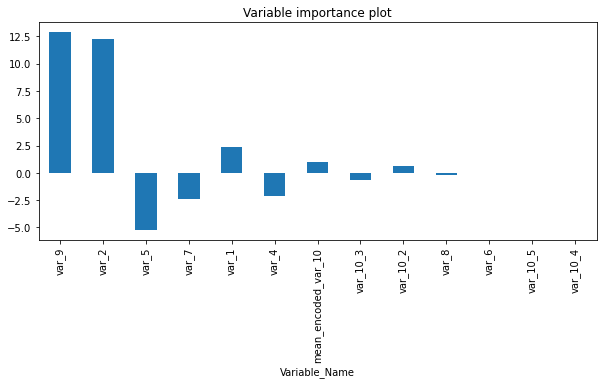

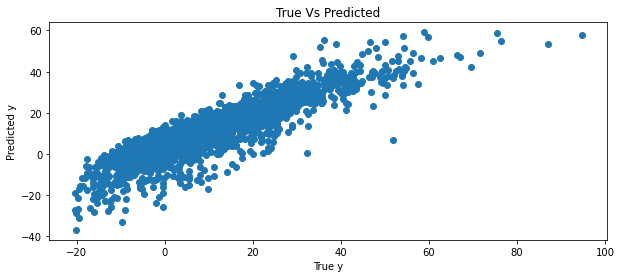

In [34]:
scaled_test_df,var_imp,mse,rmse,r_squre, mabse = utility_func.model_performance_statistics(E_Net1.best_estimator_,scaled_test_df,features,'y',
                                                                                           'el_net_1',figsize=(10,4),classification=False)

##### Elastic Net 2 (replacing  var_2 with var_2_sqr)

In [35]:
### using var_2_square

features.remove('var_2')

features.append('var_2_sqr')

# define model
model = ElasticNet(random_state=0)
# define model evaluation method
cv = 5
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
E_Net2 = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1,verbose=True)
# perform the search
E_Net2.fit(scaled_train_df[features], scaled_train_df['y'])
# summarize
print('neg_mean_squared_error: %.3f' % E_Net2.best_score_)
print('Config: %s' % E_Net2.best_params_)



Fitting 5 folds for each of 900 candidates, totalling 4500 fits
neg_mean_squared_error: -30.022
Config: {'alpha': 0.0001, 'l1_ratio': 0.07}


C:\Users\pst2c\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84189.65479225412, tolerance: 206.0762981217902
  model = cd_fast.enet_coordinate_descent(


test mse: 29.51667993727543
test rmse: 5.432925541296828
test r2: 0.8831672312887358
test mean absolute error: 4.343203825156077


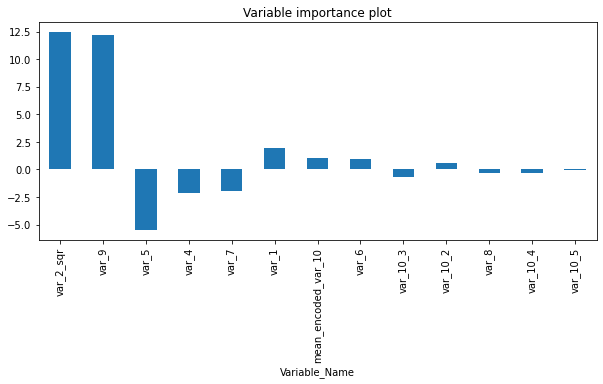

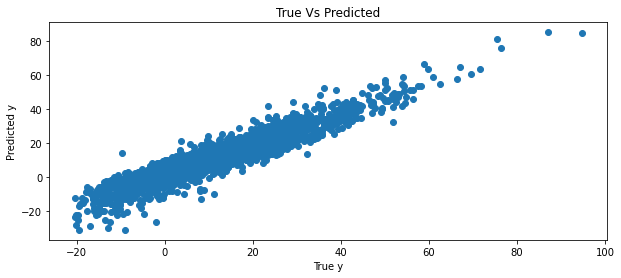

In [36]:
scaled_test_df,var_imp,mse,rmse,r_squre, mabse = utility_func.model_performance_statistics(E_Net2.best_estimator_,scaled_test_df,features,'y',
                                                                                           'el_net_2',figsize=(10,4),classification=False)

##### Elastic Net 3 with flooring and capping  Flooring and capping the variables within 3 standard deviation 

1. For true performance measurement and avoid data leakage we will only trim the train data
2. Target variable will not be trimmed

In [37]:
features

['var_7',
 'var_4',
 'var_10_5',
 'var_5',
 'mean_encoded_var_10',
 'var_10_2',
 'var_9',
 'var_6',
 'var_8',
 'var_10_3',
 'var_1',
 'var_10_4',
 'var_2_sqr']

In [38]:
feature_to_trim = list(set(features)-set(['var_10_2','var_10_3','var_10_4','var_10_5']))

In [39]:
windsoriser = Winsorizer(capping_method='gaussian', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables = feature_to_trim)

windsoriser.fit(scaled_train_df)

trans_scaled_train_df = windsoriser.transform(scaled_train_df)

In [40]:
### After removing outliers

# define model
model = ElasticNet(random_state=0)
# define model evaluation method
cv = 5
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
E_Net3 = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1,verbose=True)
# perform the search
E_Net3.fit(trans_scaled_train_df[features], trans_scaled_train_df['y'])
# summarize
print('neg_mean_squared_error: %.3f' % E_Net3.best_score_)
print('Config: %s' % E_Net3.best_params_)



Fitting 5 folds for each of 900 candidates, totalling 4500 fits
neg_mean_squared_error: -33.019
Config: {'alpha': 0.001, 'l1_ratio': 0.74}


test mse: 29.72339320055655
test rmse: 5.451916470430976
test r2: 0.8823490199272345
test mean absolute error: 4.366258079930906


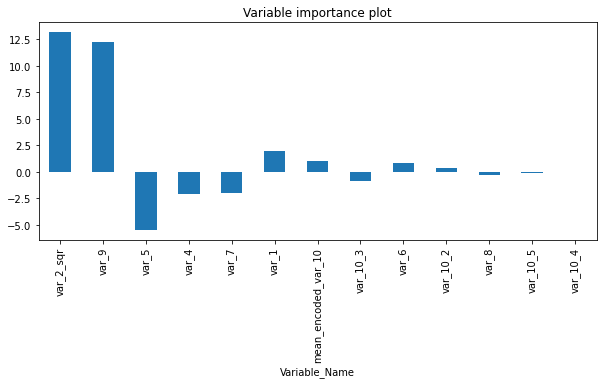

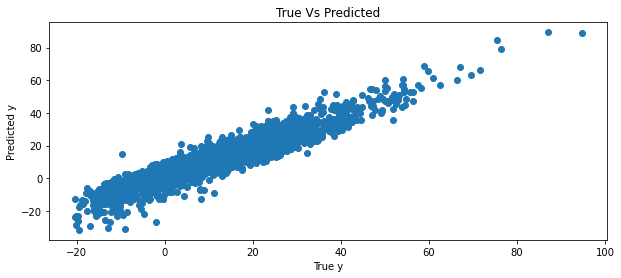

In [41]:
scaled_test_df,var_imp,mse,rmse,r_squre, mabse = utility_func.model_performance_statistics(E_Net3.best_estimator_,scaled_test_df,features,'y',
                                                                                           'el_net_3',figsize=(10,4),classification=False)

####  Building a Catboost model
1.    For catboost we have no need to scale the vairables
2.    Castboost can handle categorical variables so we have no need to one hot encode them

In [42]:
catb_features = Bhg_train_df.columns.tolist()

catb_features.remove('y')

In [43]:
catb_features

['var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_2_sqr']

In [44]:
#train_dataset = cb.Pool(Bhg_train_df, Bhg_train_df[target]) 
#test_dataset = cb.Pool(Bhg_test_df, y_test[target])


grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [3, 4, 5, 6],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]
#        ,'cat_features': ['var_10']
       ,'loss_function':['RMSE']
        ,'eval_metric':['RMSE']
        ,'early_stopping_rounds':[30]
#        ,od_type = ["Iter"],
#           od_wait = [30]
       }
cv = 5
model = cb.CatBoostRegressor(cat_features = ['var_10'])
#model = cb.CatBoostRegressor(loss_function='RMSE')
Cat_boost_model = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1,verbose=True)

Cat_boost_model.fit(Bhg_train_df[catb_features],Bhg_train_df['y'],use_best_model=True)

#Cat_boost_model.grid_search(grid, train_dataset)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 14.7235141	total: 179ms	remaining: 35.6s
1:	learn: 13.5291522	total: 205ms	remaining: 20.3s
2:	learn: 12.4934808	total: 229ms	remaining: 15.1s
3:	learn: 11.5346410	total: 266ms	remaining: 13s
4:	learn: 10.6904604	total: 279ms	remaining: 10.9s
5:	learn: 9.9005199	total: 294ms	remaining: 9.51s
6:	learn: 9.1715803	total: 310ms	remaining: 8.55s
7:	learn: 8.5205197	total: 328ms	remaining: 7.88s
8:	learn: 7.9375259	total: 343ms	remaining: 7.29s
9:	learn: 7.4099221	total: 359ms	remaining: 6.82s
10:	learn: 6.9272747	total: 376ms	remaining: 6.45s
11:	learn: 6.4962195	total: 393ms	remaining: 6.15s
12:	learn: 6.0605904	total: 409ms	remaining: 5.88s
13:	learn: 5.7136703	total: 424ms	remaining: 5.63s
14:	learn: 5.3588423	total: 439ms	remaining: 5.41s
15:	learn: 5.0190379	total: 454ms	remaining: 5.22s
16:	learn: 4.7241204	total: 469ms	remaining: 5.04s
17:	learn: 4.4369606	total: 483ms	remaining: 4.88s
18:	learn: 4.1595223	total: 498ms	remaining: 4.74s
19:	learn: 3.9202611	total: 512ms	rema

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000015EAB66D580>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6], 'early_stopping_rounds': [30],
                         'eval_metric': ['RMSE'], 'iterations': [100, 150, 200],
                         'l2_leaf_reg': [0.2, 0.5, 1, 3],
                         'learning_rate': [0.03, 0.1],
                         'loss_function': ['RMSE']},
             scoring='neg_mean_squared_error', verbose=True)

In [45]:
Cat_boost_model.best_score_

-0.574757486981764

In [46]:
Cat_boost_model.best_params_

{'depth': 5,
 'early_stopping_rounds': 30,
 'eval_metric': 'RMSE',
 'iterations': 200,
 'l2_leaf_reg': 0.5,
 'learning_rate': 0.1,
 'loss_function': 'RMSE'}

In [47]:
Cat_boost_model.best_index_

67

In [48]:
Grid_result = pd.DataFrame(Cat_boost_model.cv_results_['params'])

Grid_result['means'] = Cat_boost_model.cv_results_['mean_test_score']
Grid_result['abs_means'] = np.abs(Grid_result['means'])
Grid_result['stds'] = Cat_boost_model.cv_results_['std_test_score']
Grid_result = Grid_result.reset_index()
Grid_result.sort_values(['abs_means','stds'],inplace=True)

In [49]:
Grid_result.head()

,index,depth,early_stopping_rounds,eval_metric,iterations,l2_leaf_reg,learning_rate,loss_function,means,abs_means,stds
67,67,5,30,RMSE,200,0.5,0.1,RMSE,-0.574757,0.574757,0.178454
91,91,6,30,RMSE,200,0.5,0.1,RMSE,-0.581574,0.581574,0.174786
65,65,5,30,RMSE,200,0.2,0.1,RMSE,-0.585059,0.585059,0.200927
89,89,6,30,RMSE,200,0.2,0.1,RMSE,-0.598429,0.598429,0.193717
69,69,5,30,RMSE,200,1.0,0.1,RMSE,-0.600523,0.600523,0.159250


In [50]:
summary = utility_func.grid_search_result_summary(Cat_boost_model,(20,10),graph=False)

In [51]:
summary.head()

,index,depth,early_stopping_rounds,eval_metric,iterations,l2_leaf_reg,learning_rate,loss_function,means,abs_means,stds
67,67,5,30,RMSE,200,0.5,0.1,RMSE,-0.574757,0.574757,0.178454
91,91,6,30,RMSE,200,0.5,0.1,RMSE,-0.581574,0.581574,0.174786
65,65,5,30,RMSE,200,0.2,0.1,RMSE,-0.585059,0.585059,0.200927
89,89,6,30,RMSE,200,0.2,0.1,RMSE,-0.598429,0.598429,0.193717
69,69,5,30,RMSE,200,1.0,0.1,RMSE,-0.600523,0.600523,0.159250


In [52]:
summary.sort_values(by=['stds']).head()

,index,depth,early_stopping_rounds,eval_metric,iterations,l2_leaf_reg,learning_rate,loss_function,means,abs_means,stds
69,69,5,30,RMSE,200,1.0,0.1,RMSE,-0.600523,0.600523,0.159250
93,93,6,30,RMSE,200,1.0,0.1,RMSE,-0.607968,0.607968,0.174293
91,91,6,30,RMSE,200,0.5,0.1,RMSE,-0.581574,0.581574,0.174786
67,67,5,30,RMSE,200,0.5,0.1,RMSE,-0.574757,0.574757,0.178454
71,71,5,30,RMSE,200,3.0,0.1,RMSE,-0.653382,0.653382,0.187591


test mse: 0.4054605052433939
test rmse: 0.6367578073674431
test r2: 0.9983951083410695
test mean absolute error: 0.394362621112057


C:\Piyush\BHG\Code\utility_func.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = model_object.predict(df[feature_list])


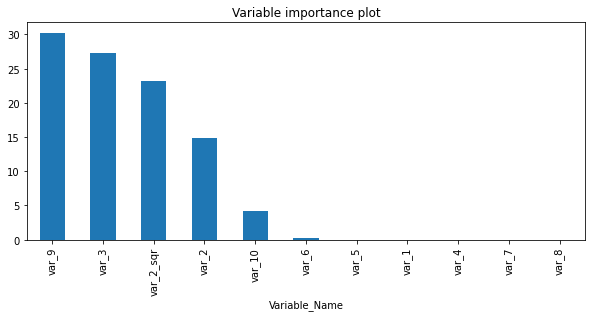

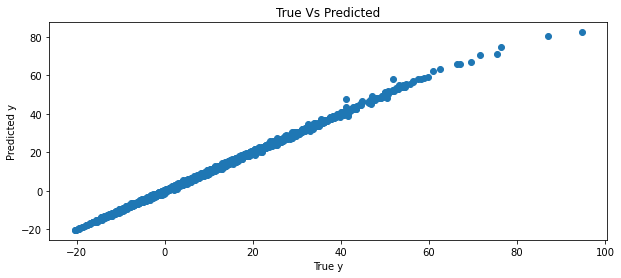

In [53]:
Bhg_test_df,var_imp,mse,rmse,r_squre, mabse = utility_func.model_performance_statistics(Cat_boost_model.best_estimator_,
                                                                                           Bhg_test_df,catb_features,'y',
                                                                                'cat_boost_1',figsize=(10,4),classification=False,ols=False)

In [54]:
grid = {'iterations': [ 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [ 5, 6],
        'l2_leaf_reg': [ 0.5,1]
#        ,'cat_features': ['var_10']
       ,'loss_function':['RMSE']
        ,'eval_metric':['RMSE']
        ,'early_stopping_rounds':[30]
#        ,od_type = ["Iter"],
#           od_wait = [30]
       }


# estimator = cb.CatBoostRegressor(cat_features = ['var_10'])

estimator = cb.CatBoostRegressor()

In [55]:
Bhg_train_df.head()

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_2_sqr
9254,-7.421907,8355.151233,2871.445496,428646.41590,1.744506,107084.20740,12833.806030,1.340301e+06,22155.976290,73805.29156,2,8.245199e+06
1561,25.500000,8158.027319,-1454.530138,-89838.58512,2.421938,66739.18108,1145.451428,1.438032e+06,14285.305820,356105.28750,3,2.115658e+06
1670,27.776466,6371.030151,678.805691,-83696.47600,1.506342,18590.07320,49817.459190,8.563878e+05,18374.731310,271229.59980,2,4.607772e+05
6087,3.790586,9034.047125,2556.558300,243090.89530,0.980197,121042.76590,7654.954981,1.886371e+06,-9911.446565,171844.95700,3,6.535990e+06
6669,-0.450017,7104.138850,5774.440625,357983.98620,1.665088,95874.80843,128263.998300,8.685285e+05,32922.185550,91303.16116,4,3.334416e+07


In [56]:
var_imp

,Variable_Importance
Variable_Name,
var_9,30.269444
var_3,27.253006
var_2_sqr,23.207949
var_2,14.805650
var_10,4.172097
var_6,0.235971
var_5,0.018157
var_1,0.012214
var_4,0.011944


In [57]:
overall_performance,dropped_perf_summmary = utility_func.rfe_cv_backward(Bhg_train_df,'y',catb_features,'neg_mean_squared_error',grid,1
                                                                         ,estimator,random_state=0,validation_data=None,cv=5,
                                                                         n_jobs=-1 , cross_validation=True)

0:	learn: 14.7161510	total: 2.28ms	remaining: 455ms
1:	learn: 13.5785319	total: 4.23ms	remaining: 419ms
2:	learn: 12.5733988	total: 6.2ms	remaining: 407ms
3:	learn: 11.5854540	total: 8.12ms	remaining: 398ms
4:	learn: 10.7282842	total: 10ms	remaining: 391ms
5:	learn: 9.9390041	total: 12ms	remaining: 389ms
6:	learn: 9.2305959	total: 14ms	remaining: 386ms
7:	learn: 8.5846880	total: 15.8ms	remaining: 380ms
8:	learn: 8.0142026	total: 17.8ms	remaining: 378ms
9:	learn: 7.4790310	total: 19.8ms	remaining: 376ms
10:	learn: 6.9819440	total: 21.8ms	remaining: 375ms
11:	learn: 6.5313381	total: 24.1ms	remaining: 378ms
12:	learn: 6.1113101	total: 26.3ms	remaining: 378ms
13:	learn: 5.7166753	total: 28.2ms	remaining: 375ms
14:	learn: 5.3876409	total: 30.3ms	remaining: 374ms
15:	learn: 5.0825698	total: 32.2ms	remaining: 371ms
16:	learn: 4.7928520	total: 34.2ms	remaining: 368ms
17:	learn: 4.5246277	total: 36.1ms	remaining: 365ms
18:	learn: 4.2842321	total: 37.9ms	remaining: 361ms
19:	learn: 4.0655622	tot

In [58]:
overall_performance

,Iteration_id,Model_id,Dropped_variable,validation_score
4,0,4,var_5,-0.486307
0,0,0,var_1,-0.488652
3,0,3,var_4,-0.489786
7,0,7,var_8,-0.495359
6,0,6,var_7,-0.509520
5,0,5,var_6,-0.512498
10,0,10,var_2_sqr,-0.518193
1,0,1,var_2,-0.808805
9,0,9,var_10,-7.882519
2,0,2,var_3,-8.906500


In [59]:
dropped_perf_summmary

,Iteration_id,Dropped_variable,Num_feature,validation_score
0,0,var_5,10,-0.486307
1,1,var_1,9,-0.479516
2,2,var_8,8,-0.460420
3,3,var_4,7,-0.466809
4,4,var_7,6,-0.481092
5,5,var_2_sqr,5,-0.454133
6,6,var_6,4,-0.502116
7,7,var_10,3,-7.816958
8,8,var_3,2,-58.047912
9,9,var_9,1,-168.510174


#### Refit the model with best Hyperparameters.

1. We received the best Hyperparameters. Also we will keep all the features since we know there is reduction in RMSE 
    even if we try to drop one variable. Also, since we don't know the business problem so we don't know if the drop
    is significant or not

In [65]:
#train_dataset = cb.Pool(Bhg_train_df, Bhg_train_df[target]) 
#test_dataset = cb.Pool(Bhg_test_df, y_test[target])

best_hyper_parameter = {'depth': 5,
 'early_stopping_rounds': 30,
 'eval_metric': 'RMSE',
 'iterations': 200,
 'l2_leaf_reg': 0.5,
 'learning_rate': 0.1,
 'loss_function': 'RMSE'}

final_model = cb.CatBoostRegressor(**best_hyper_parameter,cat_features = ['var_10'])
#model = cb.CatBoostRegressor(loss_function='RMSE')
#Cat_boost_model = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1,verbose=True)

final_model.fit(Bhg_train_df[catb_features],Bhg_train_df['y'])

#Cat_boost_model.grid_search(grid, train_dataset)

0:	learn: 14.7235141	total: 18.8ms	remaining: 3.73s
1:	learn: 13.5291522	total: 40.9ms	remaining: 4.05s
2:	learn: 12.4934808	total: 66.2ms	remaining: 4.35s
3:	learn: 11.5346410	total: 96ms	remaining: 4.7s
4:	learn: 10.6904604	total: 124ms	remaining: 4.82s
5:	learn: 9.9005199	total: 154ms	remaining: 4.98s
6:	learn: 9.1715803	total: 185ms	remaining: 5.1s
7:	learn: 8.5205197	total: 221ms	remaining: 5.31s
8:	learn: 7.9375259	total: 275ms	remaining: 5.83s
9:	learn: 7.4099221	total: 315ms	remaining: 5.98s
10:	learn: 6.9272747	total: 349ms	remaining: 5.99s
11:	learn: 6.4962195	total: 382ms	remaining: 5.98s
12:	learn: 6.0605904	total: 416ms	remaining: 5.98s
13:	learn: 5.7136703	total: 449ms	remaining: 5.96s
14:	learn: 5.3588423	total: 473ms	remaining: 5.84s
15:	learn: 5.0190379	total: 504ms	remaining: 5.79s
16:	learn: 4.7241204	total: 551ms	remaining: 5.93s
17:	learn: 4.4369606	total: 601ms	remaining: 6.08s
18:	learn: 4.1595223	total: 657ms	remaining: 6.26s
19:	learn: 3.9202611	total: 692ms	re

C:\Piyush\BHG\Code\utility_func.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = model_object.predict(df[feature_list])


test mse: 0.4054605052433939
test rmse: 0.6367578073674431
test r2: 0.9983951083410695
test mean absolute error: 0.394362621112057


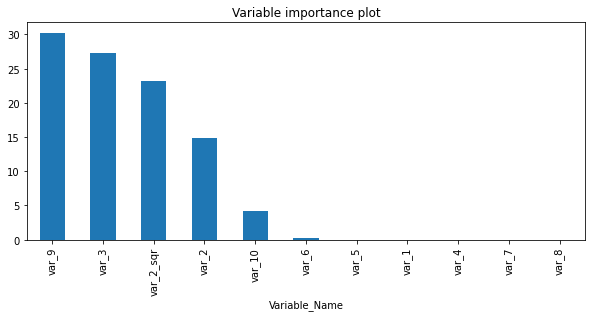

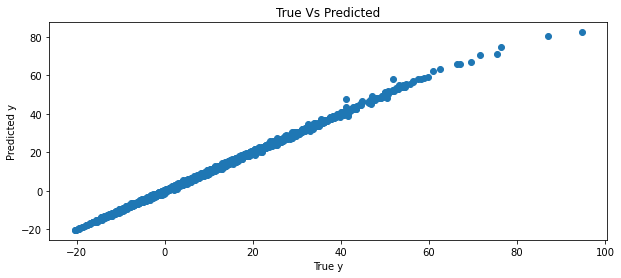

In [66]:
Bhg_test_df,var_imp,mse,rmse,r_squre, mabse = utility_func.model_performance_statistics(final_model,
                                                                                Bhg_test_df,catb_features,'y',
                                                                        'cat_boost_final',figsize=(10,4),classification=False,ols=False)

### Summary

The Assignment has a contionus tragte ('y') and 10 predictors from var_ to var_10. Since target variable is a continuous variables
and so its a regression problem with supervised learning

#### Data Review :
1. The data set has 10,000 observation and 10 predictors with continuous target variable 'y'
2. None of the variable has missing values
3. Other than var_10 all other predictors are continuous variables
4. var_10 is as disccrete variable with 5 possible values. This looks like a categoriical variable with 5 possible values.
    Here the categories are coded from 1 to 5.
    
    
#####     Key Take Away from visulization 
          1. All the continuous predictors are almost normally distributed. The target variable 'y is right skewed'
          2. var_2 has plot similt to x**2 and square of this variable has more linear trend with targey 'y'
        
#####     Summary of Correlation Analysis

          1. The correlation between var_3 and var_5 var_2 and var_6 is seems to be high (.8,.6 respectively) 
        
### Model Building :

    Since its a regression problem and one of the input is categorical variable so a base model using ElasticNet and ensamble model 
    using Catboost were considered.
    
        1. The Elastic Net was considered over simple linear regression because it's combine both l1 and l2 norm regularization
            and the model generalize better.
        2. The Catboost was selected among all ensemble models because the input data has a categorical variable and 
            usually catboost perform best for categorical variables.
            
            
 #### Feature Engineering

            1. We added the mean for each category from var_10. Again these mean values for each cateogry were calculated
                  using training data only
            
#### Model Building Procedure :

#### Metric Selection for Model :

            For regression problem we can use roor mean square error(RMSE) or absolute error(ABSE). Root RMSE penalize
            higher error more severly. Since we don't know the business problem so cannot decide between RMSE and absolute
            error. So for my assignment I just pciked RMSE.
        
#####       Elastic Net Model :
        
            1.  For Elastic Net model models we need to scale the variables using guissian method or mi max scalar. The 
                standarization is must if we want to interpret variable importance correctly. The standarization also 
                helps in converging graident decent algorithm faster for calculation of weights. 
            2.  For Elastic Net method we also have to encode the categorical variable var_10. I used one hot encoded method. 
            3.  For Elastic net method we also have to account for multiculinearty. To reduce the impact of multiculinearty
                we did not consider the variables with higher than 10 VIF
            4.  To prevent data leakage from training to test we standarie the test data based on values obtained from train
                only.
            5. Three different Elastic NEt Model were tried. {1) with var_2 {ii) replacing car_2 with square of var_2 and
                (iii) using square of var_2 and capping and flooring the values between 3 standard deviation. Capping and 
                flooring is required to minimize the impact of outlier during modeling as well as during production.
            6.  The final base model will be ElasticNet3
                
####         CastBoost Model :
        
                1. For Catboost model we don't need to standarize or enode the variables.
                2. It also doesn't get impacted by multicolinearty but the variable importance does.
                2. I also used backward stepwise recusirve feature elimination to get rid of unwanted features.
                
####  Model Selection:

            Since Catboost outperform EmasticNet by a big margin so we picked Catboost over ElasticNet
                
#### Feature Selection for CatBoost :

            1. We used step wise backward feature selection to get the importance of each variables and their impact on
               model perofrmanc.
            2. Most of the lift is coming from variables var_3, var_9 and var_10
            3. Rest of the variables have very little impact on model perofrmanc
            4. Since we don't know the business problem so its not possible for me to quanitify .07 reduction in RMSE
            also whether we should overpredict or underpredict. Because of this I will keep all the variables in the model
            
####  Model Performance :

            The final Catsboost model has a training RMSE of -0.574 and test RMSE of .63. There is no bigg difference between
            two so we can say that model is not generlizing well and its not overfitting
                

        
                
                
   
